<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'> 
        
# DCPP Group Assignment
        
### Submitted by:
        
##### Achin Bhatia - 12110014
        
##### Kunal Baghel - 12110107
        
##### Simantini Ghosh - 12110098
        
##### Virendra Shekhawat - 12110040 </H3>


<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <H3> Members of Parliament across years since independence. </H3>

#### Importing the relevant libraries

In [665]:
import pandas as pd
import xlrd
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
# Let's also suppress warnings
import warnings
warnings.filterwarnings('ignore')

# We have carried out analysis using various functions, however in the last section, we also include sweetviz analysis
pip install sweetviz --user
import sweetviz

In [666]:
df = pd.read_excel('MPList500.xlsm')
df.head()

,Sl. No,Name Of Member,Party Name,Constituency (State),Lok Sabha Experience,URLs
0,1,"A. Raja , Shri",Dravida Munnetra Kazhagam,Nilgiris (SC)(Tamil Nadu),"11,13,14,15,17",http://loksabhaph.nic.in/Members/MemberBioprof...
1,2,"Aaroon Rasheed , Shri J.M.",Indian National Congress,Theni (Tamil Nadu),"14,15",http://loksabhaph.nic.in/Members/MemberBioprof...
2,3,"Abbaiah , Shri Narayana Swamy",Bharatiya Janata Party,Chitradurga (SC)(Karnataka),17,http://loksabhaph.nic.in/Members/MemberBioprof...
3,4,"Abbasi , Kazi Jalil",Congress (I),Domariaganj (Uttar Pradesh),"7,8",http://loksabhaph.nic.in/Members/MemberBioprof...
4,5,"Abdul Lateef , Shri",Congress,Nalgonda (Andhra Pradesh),6,http://loksabhaph.nic.in/Members/MemberBioprof...


In [667]:
header = ["Name", "Constituency", 'Party Name', 'Email', '']

In [668]:
def cleanstr(s):
    for ch in ['\n','\r']:
        s=s.replace(ch,'')
    while '  ' in s:
        s=s.replace('  ',' ')
    return s.strip()

In [669]:
# c=0
# output_df = pd.DataFrame()
# for url in df.URLs[:]:
#     c+=1

# #     print(c,url)
#     page = requests.get(url)
#     soup = BeautifulSoup(page.content, "html.parser")
#     table = soup.find(id="ContentPlaceHolder1_Datagrid1")

#     try:
#         table_rows = table.find_all('td')[1::2]
#         l=[cleanstr(tr.text) for tr in table_rows]
#         t1 = pd.DataFrame(l).T
#         t1.columns = header

#         table2 = soup.find(id="ContentPlaceHolder1_DataGrid2")
#         t2 = pd.read_html(str(table2))[1][1:].T
#         t2.columns = [x if str(x)!="nan" else 'Delete' for x in t2.iloc[0].values]
#         t2 = t2[1:].reset_index(drop=True)
#         try:
#             t2 = t2.drop(columns=["Delete"],axis=0)
#         except:
#             pass
#         t = pd.concat([t1, t2], axis=1)
#         #display(t)
#     except:
#         try:
#             table = soup.find_all('table')
#             t = pd.read_html(str(table))[1]
# #             print('No table found. Full data pushed')
#             #print(t.columns)
#             if len(t.columns)==1:
#                 t.columns=['Name']
#             else:
#                 t.columns=['','Name']
#             #display(t)
#         except:
#             table = page.text
# #             print('No table found. Full data pushed')
#             t = pd.DataFrame(list([table]), columns=['Name'])
# #             print(t.columns)
#             if len(t.columns)==1:
#                 t.columns=['Name']
#             else:
#                 t.columns=['','Name']

#     #display(t)

#     if len(output_df)!=0:
#         output_df = pd.concat([output_df, t], axis=0).reset_index(drop=True)
#     else:
#         output_df=t

# #     if c == 40 :
# #         break;
# output_df

### Converting this dataframe into an excel file for observation and to ensure we do not have to re-run the above code time and again as it takes a lot of time.

In [670]:
# ouput_df.to_excel('mps.xlsx')

### Loading the dataset

In [805]:
data = pd.read_excel("mps.xlsx", sheet_name='test')  
data.head()

,Unnamed: 0,Name,Constituency,Party Name,Email,Unnamed: 5,Father's Name,Mother's Name,Date of Birth,Place of Birth,Marital Status,Date of Marriage,Spouse's Name,No.of Daughters,Educational Qualifications,Profession,Permanent Address,Present Address,Positions Held,No. of Sons
0,0,"A. Raja, Shri",Nilgiris (SC) (Tamil Nadu),Dravida Munnetra Kazhagam(DMK),raja[DOT]andimuthu[AT]gmail[DOT]com a[DOT]raja...,NaN,Shri S.K. Andimuthu,Smt. Chinnapillai,1963-05-10,"Velur, Distt. Perambalur (Tamil Nadu)",Married,1996-02-04,Smt. M.A. Parameswari,1,"B.Sc., B.L., M.L. Educated at Government Arts ...",Advocate,"3/125, Mariamman Kovil Street, Vill.& P.O. Vel...","21, Lodhi Estate, New Delhi-110003 Tel : (01...",NaN,NaN
1,1,"Aaroon Rasheed, Shri J.M.",Theni (Tamil Nadu),Indian National Congress (INC),jm[DOT]aaronrasheed[AT]sansad[DOT]nic[DOT]in,NaN,Shri Jamal Mohideen,Smt. S.J.M.H. Bivi,1950-05-13,Chennai (Tamil Nadu),Married,1978-11-29,Smt. J.M.H.Hazaran Bi,2,IntermediateEducated at Sir Thiyagaraja Colleg...,Businessperson Agriculturist,"(i) 7, VRC Road, Street - I Teynampet, Chenna...","3, Mahadev Road, New Delhi - 110 001 Tel. (0...",NaN,2
2,2,"Abbaiah, Shri Narayana Swamy",Chitradurga (SC) (Karnataka),Bharatiya Janata Party(BJP),anarayanaswamyanekal5[AT]gmail[DOT]com a[DOT]n...,NaN,Shri Abbaiah,Smt. Thimmakka,1957-05-16,"Anekal, Bangaluru, Karnataka",Married,1996-04-25,Smt. T. Vijaya Kumari,3,"B.A. Educated at Government Arts College, Beng...",Businessperson Social Worker,"Munivenkatappa, Layout Chanpura, Main Road, An...","Flat No. 401, Ganga Apartment, Dr. B.D. Marg, ...",NaN,NaN
3,3,"ABBASI, KAZI JALIL , B.A., LL.B. [Congress (...",.,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"ABDUL LATEEF, SHRI, Congress, (Andhra Pradeshâ...",.,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's have a quick look at the dataset

In [807]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  5011 non-null   int64         
 1   Name                        5000 non-null   object        
 2   Constituency                5011 non-null   object        
 3   Party Name                  1768 non-null   object        
 4   Email                       1312 non-null   object        
 5   Unnamed: 5                  20 non-null     object        
 6   Father's Name               1741 non-null   object        
 7   Mother's Name               1633 non-null   object        
 8   Date of Birth               1754 non-null   datetime64[ns]
 9   Place of Birth              1732 non-null   object        
 10  Marital Status              1742 non-null   object        
 11  Date of Marriage            1507 non-null   datetime64[n

In [673]:
data.describe(include = 'all')

,Unnamed: 0,Name,Constituency,Party Name,Email,Unnamed: 5,Father's Name,Mother's Name,Date of Birth,Place of Birth,Marital Status,Date of Marriage,Spouse's Name,No.of Daughters,Educational Qualifications,Profession,Permanent Address,Present Address,Positions Held,No. of Sons
count,5011.00000,5000,5011,1768,1312,20,1741,1633,1754,1732,1742,1507,1649,1224.0,1745,1688,1765,1747,0.0,1358.0
unique,NaN,4063,840,98,1311,20,1722,1572,1611,1556,9,1367,1606,14.0,1632,566,1765,1746,NaN,12.0
top,NaN,Fifth Lok Sabha,.,Bharatiya Janata Party(BJP),speakerloksabha[AT]sansad[DOT]nic[DOT]in,http://www[DOT]shivajirao[DOT]com,Shri Narayan Singh,Smt. Shanti Devi,1951-06-01 00:00:00,Delhi,Married,1984-05-04 00:00:00,Smt. Savitri Devi,1.0,Matriculate,Agriculturist,"65, Gausgani, Wazirganj, Lucknow, Uttar Prade...","11-A, Balawant Rai Mehta Lane, Kasturba Gandhi...",NaN,1.0
freq,NaN,308,3242,413,2,1,3,10,4,17,1602,5,5,664.0,23,227,1,2,NaN,693.0
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-06-03 00:00:00,NaN,NaN,1937-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2029-10-05 00:00:00,NaN,NaN,2019-11-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2505.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1446.69543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1252.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
- Most of the values are categorical 
- We observe that variable Constituency has "." as values, let's get rid of such values

In [674]:
data = data[data.Constituency != "."]

In [675]:
data.head()

,Unnamed: 0,Name,Constituency,Party Name,Email,Unnamed: 5,Father's Name,Mother's Name,Date of Birth,Place of Birth,Marital Status,Date of Marriage,Spouse's Name,No.of Daughters,Educational Qualifications,Profession,Permanent Address,Present Address,Positions Held,No. of Sons
0,0,"A. Raja, Shri",Nilgiris (SC) (Tamil Nadu),Dravida Munnetra Kazhagam(DMK),raja[DOT]andimuthu[AT]gmail[DOT]com a[DOT]raja...,NaN,Shri S.K. Andimuthu,Smt. Chinnapillai,1963-05-10,"Velur, Distt. Perambalur (Tamil Nadu)",Married,1996-02-04,Smt. M.A. Parameswari,1,"B.Sc., B.L., M.L. Educated at Government Arts ...",Advocate,"3/125, Mariamman Kovil Street, Vill.& P.O. Vel...","21, Lodhi Estate, New Delhi-110003 Tel : (01...",NaN,NaN
1,1,"Aaroon Rasheed, Shri J.M.",Theni (Tamil Nadu),Indian National Congress (INC),jm[DOT]aaronrasheed[AT]sansad[DOT]nic[DOT]in,NaN,Shri Jamal Mohideen,Smt. S.J.M.H. Bivi,1950-05-13,Chennai (Tamil Nadu),Married,1978-11-29,Smt. J.M.H.Hazaran Bi,2,IntermediateEducated at Sir Thiyagaraja Colleg...,Businessperson Agriculturist,"(i) 7, VRC Road, Street - I Teynampet, Chenna...","3, Mahadev Road, New Delhi - 110 001 Tel. (0...",NaN,2
2,2,"Abbaiah, Shri Narayana Swamy",Chitradurga (SC) (Karnataka),Bharatiya Janata Party(BJP),anarayanaswamyanekal5[AT]gmail[DOT]com a[DOT]n...,NaN,Shri Abbaiah,Smt. Thimmakka,1957-05-16,"Anekal, Bangaluru, Karnataka",Married,1996-04-25,Smt. T. Vijaya Kumari,3,"B.A. Educated at Government Arts College, Beng...",Businessperson Social Worker,"Munivenkatappa, Layout Chanpura, Main Road, An...","Flat No. 401, Ganga Apartment, Dr. B.D. Marg, ...",NaN,NaN
5,5,"Abdul Rahman, Shri",Vellore (Tamil Nadu),Dravida Munnetra Kazhagam (DMK),rahmanexec[AT]yahoo[DOT]com,NaN,Shri Mohaideen Abdul Kader,Smt. Ainul Marlia,1959-05-28,"Muthupet, Distt. Tiruvarur (Tamil Nadu)",Married,1985-02-14,Smt. Ruhaiya Beevi,1,"M.A. (Economics), Diploma in Computer Programm...",Businessperson,"No. 6, Scheme Road, Silver Scheme Building, M...","189, North Avenue, New Delhi - 110 001 Tels....",NaN,2
10,10,"Abdullah, Dr. Farooq",Srinagar (Jammu and Kashmir),Jammu and Kashmir National Conference(J&KNC),iamfarooq80[AT]hotmail[DOT]com abdullah[AT]san...,NaN,Late Shri Sheikh Mohammad Abdullah,Late Begam Akbar Jehan Abdullah,1937-10-21,Srinagar ( Jammu & Kashmir),Married,1968-09-14,Smt. Mollie Abdullah,3,"M.B.B.S.Educated at S.M.S. Medical College, Ja...",Social Worker,"40, Gupkar Road, Srinagar, Jammu & Kashmir T...","AB - 9, Tilak Marg, New Delhi-110001 Telefax...",NaN,1


### Observations
- Few columns seem not adding any value, let's get rid of these:
    - Unnamed: 0 - this looks like serial number
    - Email - we cannot use this for any analysis
    - Unnamed: 5 - has only NaN values
    - Positions Held - has only NaN values

In [676]:
data=data.drop(columns = ['Unnamed: 0', 'Email', 'Unnamed: 5', 'Positions Held'],  axis= 1)

In [677]:
data.head()

,Name,Constituency,Party Name,Father's Name,Mother's Name,Date of Birth,Place of Birth,Marital Status,Date of Marriage,Spouse's Name,No.of Daughters,Educational Qualifications,Profession,Permanent Address,Present Address,No. of Sons
0,"A. Raja, Shri",Nilgiris (SC) (Tamil Nadu),Dravida Munnetra Kazhagam(DMK),Shri S.K. Andimuthu,Smt. Chinnapillai,1963-05-10,"Velur, Distt. Perambalur (Tamil Nadu)",Married,1996-02-04,Smt. M.A. Parameswari,1,"B.Sc., B.L., M.L. Educated at Government Arts ...",Advocate,"3/125, Mariamman Kovil Street, Vill.& P.O. Vel...","21, Lodhi Estate, New Delhi-110003 Tel : (01...",NaN
1,"Aaroon Rasheed, Shri J.M.",Theni (Tamil Nadu),Indian National Congress (INC),Shri Jamal Mohideen,Smt. S.J.M.H. Bivi,1950-05-13,Chennai (Tamil Nadu),Married,1978-11-29,Smt. J.M.H.Hazaran Bi,2,IntermediateEducated at Sir Thiyagaraja Colleg...,Businessperson Agriculturist,"(i) 7, VRC Road, Street - I Teynampet, Chenna...","3, Mahadev Road, New Delhi - 110 001 Tel. (0...",2
2,"Abbaiah, Shri Narayana Swamy",Chitradurga (SC) (Karnataka),Bharatiya Janata Party(BJP),Shri Abbaiah,Smt. Thimmakka,1957-05-16,"Anekal, Bangaluru, Karnataka",Married,1996-04-25,Smt. T. Vijaya Kumari,3,"B.A. Educated at Government Arts College, Beng...",Businessperson Social Worker,"Munivenkatappa, Layout Chanpura, Main Road, An...","Flat No. 401, Ganga Apartment, Dr. B.D. Marg, ...",NaN
5,"Abdul Rahman, Shri",Vellore (Tamil Nadu),Dravida Munnetra Kazhagam (DMK),Shri Mohaideen Abdul Kader,Smt. Ainul Marlia,1959-05-28,"Muthupet, Distt. Tiruvarur (Tamil Nadu)",Married,1985-02-14,Smt. Ruhaiya Beevi,1,"M.A. (Economics), Diploma in Computer Programm...",Businessperson,"No. 6, Scheme Road, Silver Scheme Building, M...","189, North Avenue, New Delhi - 110 001 Tels....",2
10,"Abdullah, Dr. Farooq",Srinagar (Jammu and Kashmir),Jammu and Kashmir National Conference(J&KNC),Late Shri Sheikh Mohammad Abdullah,Late Begam Akbar Jehan Abdullah,1937-10-21,Srinagar ( Jammu & Kashmir),Married,1968-09-14,Smt. Mollie Abdullah,3,"M.B.B.S.Educated at S.M.S. Medical College, Ja...",Social Worker,"40, Gupkar Road, Srinagar, Jammu & Kashmir T...","AB - 9, Tilak Marg, New Delhi-110001 Telefax...",1


In [678]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769 entries, 0 to 5008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        1769 non-null   object        
 1   Constituency                1769 non-null   object        
 2   Party Name                  1768 non-null   object        
 3   Father's Name               1741 non-null   object        
 4   Mother's Name               1633 non-null   object        
 5   Date of Birth               1754 non-null   datetime64[ns]
 6   Place of Birth              1732 non-null   object        
 7   Marital Status              1742 non-null   object        
 8   Date of Marriage            1507 non-null   datetime64[ns]
 9   Spouse's Name               1649 non-null   object        
 10  No.of Daughters             1224 non-null   object        
 11  Educational Qualifications  1745 non-null   object      

In [679]:
data.describe(include = 'all')

,Name,Constituency,Party Name,Father's Name,Mother's Name,Date of Birth,Place of Birth,Marital Status,Date of Marriage,Spouse's Name,No.of Daughters,Educational Qualifications,Profession,Permanent Address,Present Address,No. of Sons
count,1769,1769,1768,1741,1633,1754,1732,1742,1507,1649,1224.0,1745,1688,1765,1747,1358.0
unique,1767,839,98,1722,1572,1611,1556,9,1367,1606,14.0,1632,566,1765,1746,12.0
top,"Devi, Smt. Veena",Mirzapur (Uttar Pradesh),Bharatiya Janata Party(BJP),Shri Narayan Singh,Smt. Shanti Devi,1946-01-01 00:00:00,Delhi,Married,1984-05-04 00:00:00,Smt. Savitri Devi,1.0,Matriculate,Agriculturist,"65, Gausgani, Wazirganj, Lucknow, Uttar Prade...","11-A, Balawant Rai Mehta Lane, Kasturba Gandhi...",1.0
freq,2,6,413,3,10,4,17,1602,5,5,664.0,23,227,1,2,693.0
first,NaN,NaN,NaN,NaN,NaN,1930-06-03 00:00:00,NaN,NaN,1937-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2029-10-05 00:00:00,NaN,NaN,2019-11-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### For No. of Sons

### Observations:
- No. of Sons and No.of Daughters has NaN values
- Also, few values have text embedded, we will read only the first character which gives us the number
- Lastly, we will convert its datatype to integer to carry out calculation and analysis

In [680]:
data['No. of Sons'] = data['No. of Sons'].fillna(0)
data['No. of Sons'] = data['No. of Sons'].astype(str).str[0] 
data['No. of Sons'] = data['No. of Sons'].astype(int)

In [681]:
print('Average number of Sons per MP is: ', round(data['No. of Sons'].mean(),1))

Average number of Sons per MP is:  1.3


In [682]:
print('Median value of Sons per MP is: ', round(data['No. of Sons'].median(),1))

Median value of Sons per MP is:  1.0


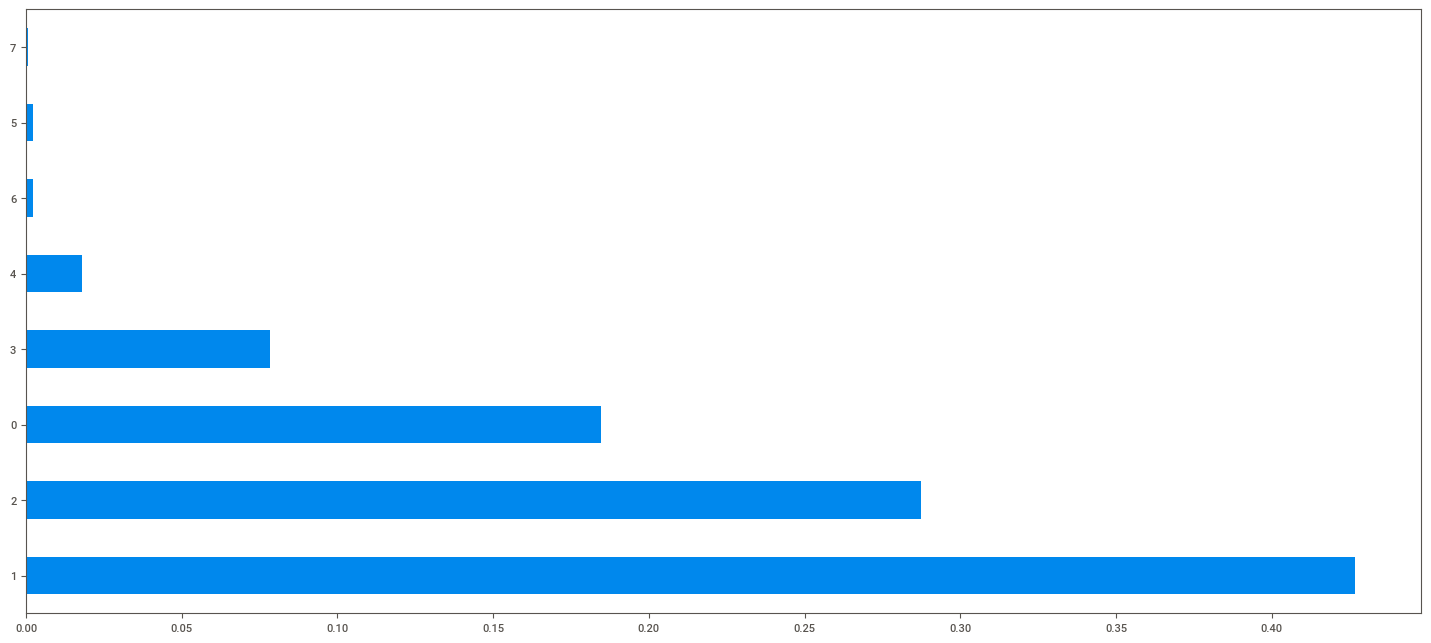

In [782]:
plt.figure(figsize = (18,8))
data['No. of Sons'].value_counts(normalize = True).plot.barh()
plt.show();

#### Observations
- Almost 3/4th of the MPs have 1 or 2 sons
- Around 18% have no sons
- Very few MPs have more than 3 sons

##### For No. of Daughters

In [683]:
data['No.of Daughters'] = data['No.of Daughters'].fillna(0)
data['No.of Daughters'] = data['No.of Daughters'].astype(str).str[0] 
data['No.of Daughters'] = data['No.of Daughters'].astype(int)

In [684]:
print('Average number of Daughters per MP is: ', round(data['No.of Daughters'].mean(),1))

Average number of Daughters per MP is:  1.2


In [685]:
print('Median number of Daughters per MP is: ', round(data['No.of Daughters'].median(),1))

Average number of Daughters per MP is:  1.0


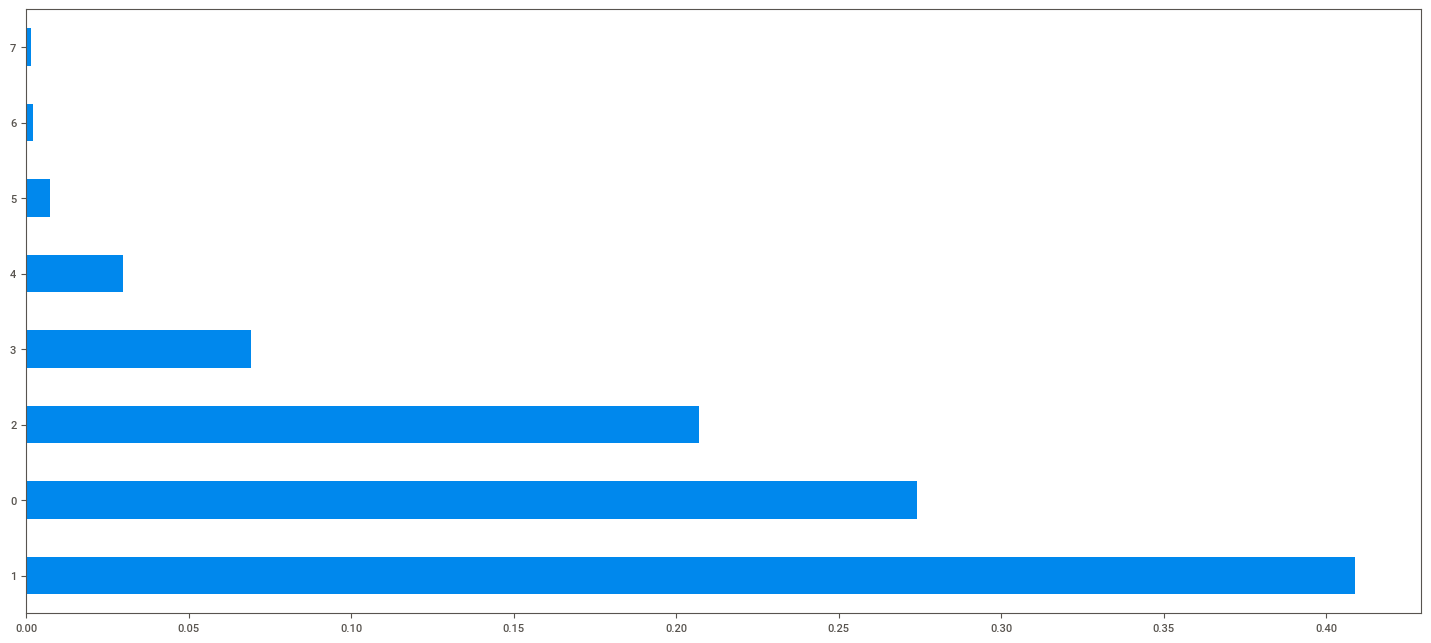

In [778]:
plt.figure(figsize = (18,8))
data['No.of Daughters'].value_counts(normalize = True).plot.barh()
plt.show();

#### Observations
- Almost 2/3rd of the MPs have 1 or 2 daughters
- Very few MPs have more than 3 daughters
- ~27% MPs have no daughters

##### Let's calculate total no. of children for each MP

In [686]:
data['No. of Children'] = data['No. of Sons'] + data['No.of Daughters']
data['No. of Children']

0       1
1       4
2       3
5       3
10      4
       ..
5000    6
5001    4
5002    2
5005    4
5008    3
Name: No. of Children, Length: 1769, dtype: int32

In [687]:
print('Average number of Children per MP is: ', round(data['No. of Children'].mean(),1))

Average number of Children per MP is:  2.5


In [688]:
print('Median number of Children per MP is: ', round(data['No. of Children'].median(),1))

Average number of Children per MP is:  2.0


In [735]:
print('Maximum number of Children for any MP is: ', round(data['No. of Children'].max(),1))

Maximum number of Children for any MP is:  12


In [745]:
print('MP with maximum no. of children is: ', data[data['No. of Children'] == data['No. of Children'].max()].Name)

MP with maximum no. of children is:  2458    Mohale, Shri Punnulal
Name: Name, dtype: object


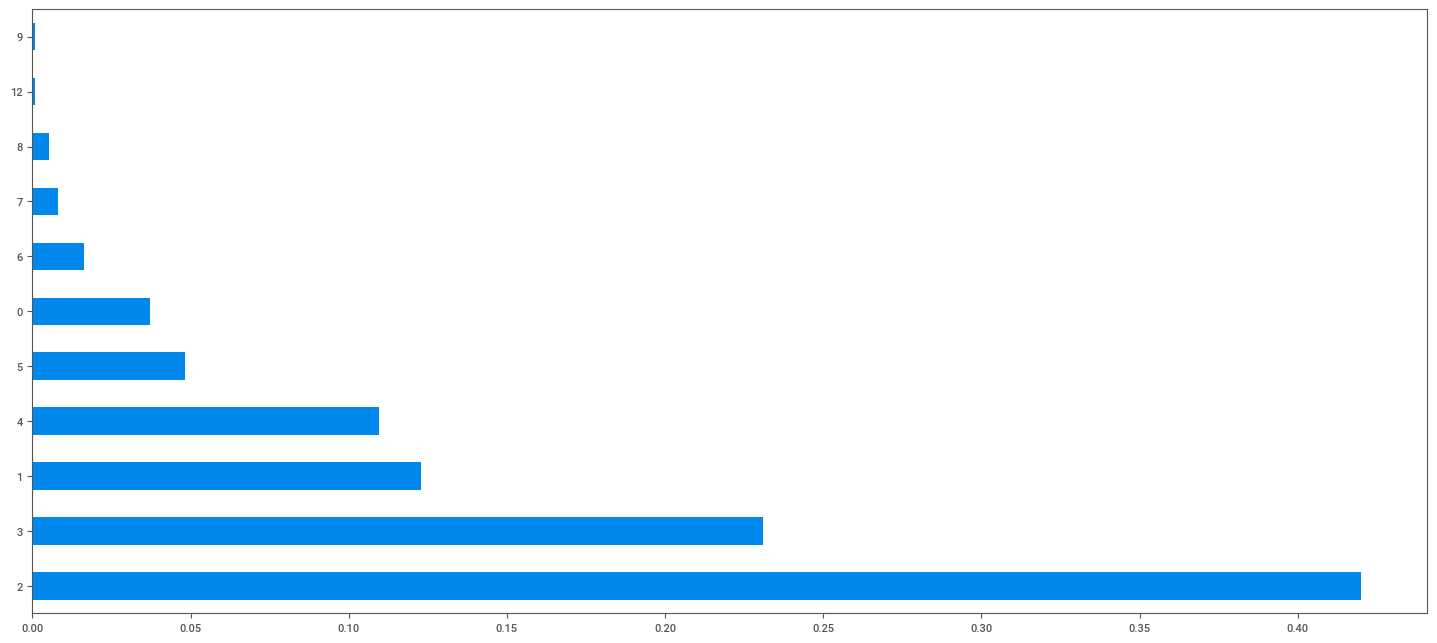

In [779]:
plt.figure(figsize = (18,8))
data['No. of Children'].value_counts(normalize = True).plot.barh()
plt.show();

#### Observations
- Around 47% MPs have 2 kids and around 12% have just one kid
- 4% MPs have no daughters
- Almost half of the MPs have more than 2 kids

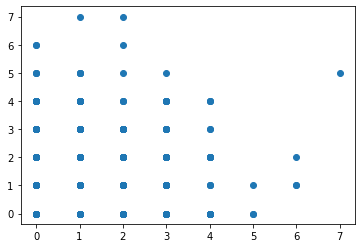

In [759]:
x = data['No. of Sons']
y = data['No.of Daughters']

plt.scatter(x, y)

In [760]:
x.corr(y)

-0.14890371136568128

<Figure size 1152x720 with 0 Axes>

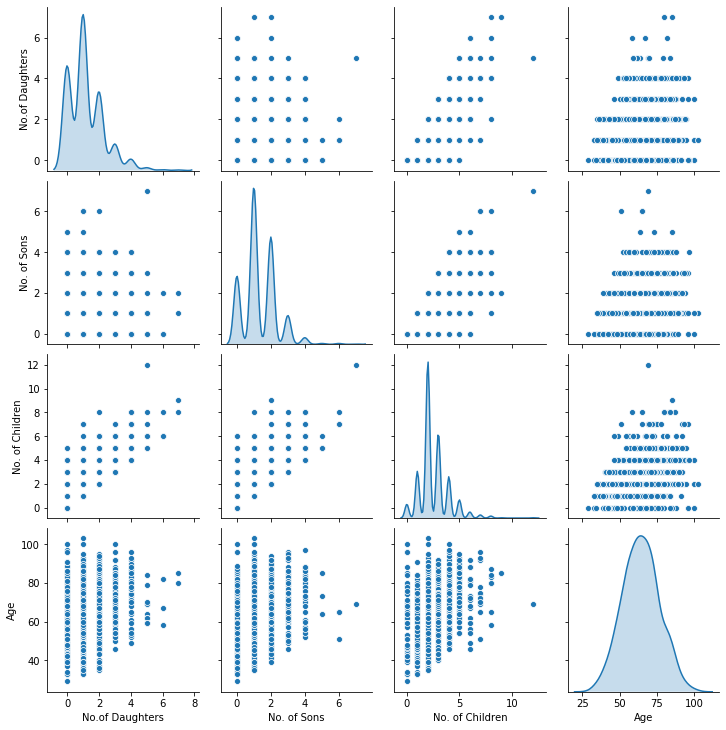

In [761]:
plt.figure(figsize = (16,10))
sns.pairplot(data, diag_kind = 'kde')
plt.show();

### Let's find the age of MPs

In [690]:
data['Date of Birth'].max()

Timestamp('2029-10-05 00:00:00')

#### Observations:
- We observe that few values in Date of Birth column are incorrect. This is because data of birth of some of the MPs is in early 20th Century
- We assume that MPs have to be at least 20 years (though we know it should be 25 at the least), we will subtract 100 years from people born in of after 2000

In [691]:
data['Date of Birth'] = np.where(data['Date of Birth'].dt.year > 2000, data['Date of Birth'] 
                                 - pd.offsets.DateOffset(years = 100), data['Date of Birth'])

In [692]:
data['Date of Birth'].max()

Timestamp('2000-01-01 00:00:00')

##### Now we can calculate the ages

In [693]:
now = pd.Timestamp('now')
data['Date of Birth'] = data['Date of Birth'].where(data['Date of Birth'] < now, data['Date of Birth'] -  np.timedelta64(100, 'Y'))   # 2
data['Age'] = (now - data['Date of Birth']).astype('<m8[Y]')
data.head()

,Name,Constituency,Party Name,Father's Name,Mother's Name,Date of Birth,Place of Birth,Marital Status,Date of Marriage,Spouse's Name,No.of Daughters,Educational Qualifications,Profession,Permanent Address,Present Address,No. of Sons,No. of Children,Age
0,"A. Raja, Shri",Nilgiris (SC) (Tamil Nadu),Dravida Munnetra Kazhagam(DMK),Shri S.K. Andimuthu,Smt. Chinnapillai,1963-05-10,"Velur, Distt. Perambalur (Tamil Nadu)",Married,1996-02-04,Smt. M.A. Parameswari,1,"B.Sc., B.L., M.L. Educated at Government Arts ...",Advocate,"3/125, Mariamman Kovil Street, Vill.& P.O. Vel...","21, Lodhi Estate, New Delhi-110003 Tel : (01...",0,1,58.0
1,"Aaroon Rasheed, Shri J.M.",Theni (Tamil Nadu),Indian National Congress (INC),Shri Jamal Mohideen,Smt. S.J.M.H. Bivi,1950-05-13,Chennai (Tamil Nadu),Married,1978-11-29,Smt. J.M.H.Hazaran Bi,2,IntermediateEducated at Sir Thiyagaraja Colleg...,Businessperson Agriculturist,"(i) 7, VRC Road, Street - I Teynampet, Chenna...","3, Mahadev Road, New Delhi - 110 001 Tel. (0...",2,4,71.0
2,"Abbaiah, Shri Narayana Swamy",Chitradurga (SC) (Karnataka),Bharatiya Janata Party(BJP),Shri Abbaiah,Smt. Thimmakka,1957-05-16,"Anekal, Bangaluru, Karnataka",Married,1996-04-25,Smt. T. Vijaya Kumari,3,"B.A. Educated at Government Arts College, Beng...",Businessperson Social Worker,"Munivenkatappa, Layout Chanpura, Main Road, An...","Flat No. 401, Ganga Apartment, Dr. B.D. Marg, ...",0,3,64.0
5,"Abdul Rahman, Shri",Vellore (Tamil Nadu),Dravida Munnetra Kazhagam (DMK),Shri Mohaideen Abdul Kader,Smt. Ainul Marlia,1959-05-28,"Muthupet, Distt. Tiruvarur (Tamil Nadu)",Married,1985-02-14,Smt. Ruhaiya Beevi,1,"M.A. (Economics), Diploma in Computer Programm...",Businessperson,"No. 6, Scheme Road, Silver Scheme Building, M...","189, North Avenue, New Delhi - 110 001 Tels....",2,3,62.0
10,"Abdullah, Dr. Farooq",Srinagar (Jammu and Kashmir),Jammu and Kashmir National Conference(J&KNC),Late Shri Sheikh Mohammad Abdullah,Late Begam Akbar Jehan Abdullah,1937-10-21,Srinagar ( Jammu & Kashmir),Married,1968-09-14,Smt. Mollie Abdullah,3,"M.B.B.S.Educated at S.M.S. Medical College, Ja...",Social Worker,"40, Gupkar Road, Srinagar, Jammu & Kashmir T...","AB - 9, Tilak Marg, New Delhi-110001 Telefax...",1,4,84.0


In [694]:
print('Average age of an MP is: ', round(data['Age'].mean(),1), 'years.')

Average age of an MP is:  65.0 years.


In [695]:
print('Median age of an MP is: ', round(data['Age'].median(),1), 'years.')

Median age of an MP is:  65.0 years.


##### Let's look at the age distribution

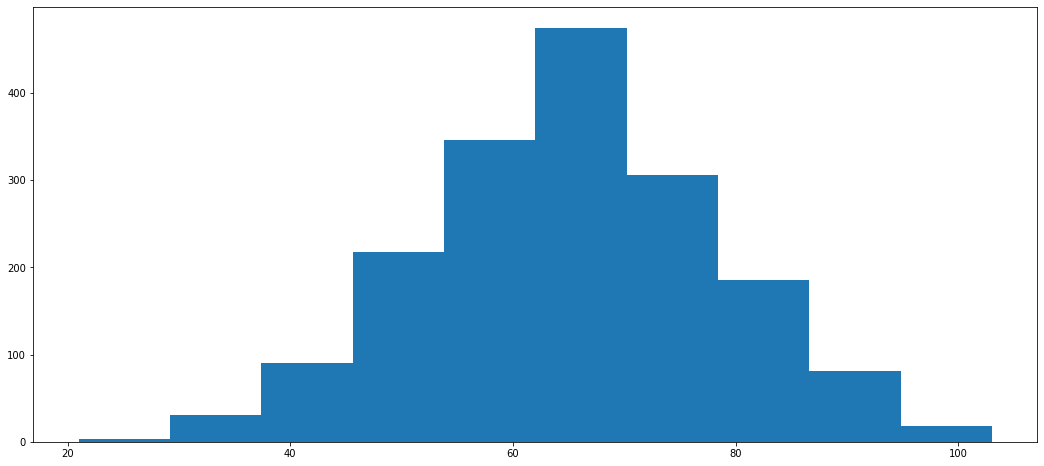

In [696]:
plt.figure(figsize = (18,8))
plt.hist(data['Age'])
plt.show();

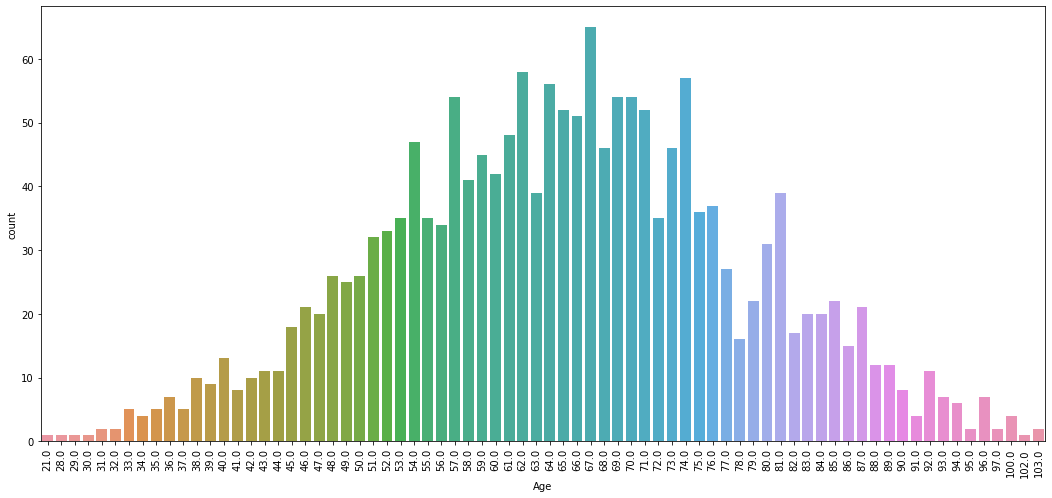

In [697]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'Age', data = data)
xticks(rotation = 90)
plt.show();

In [746]:
print("Oldest MP's age is: ", round(data['Age'].max(),1))

Oldest MP's age is:  103.0


In [748]:
print('Oldest MP is: ', data[data['Age'] == data['Age'].max()].Name)

Oldest MP is:  1744    Karunakaran, Shri K.
Name: Name, dtype: object


In [749]:
print('Youngest MP is: ', data[data['Age'] == data['Age'].min()].Name)

Youngest MP is:  2106    Madhavi, Smt. Goddeti
Name: Name, dtype: object


#### Let's have a look at marital status of the MPs

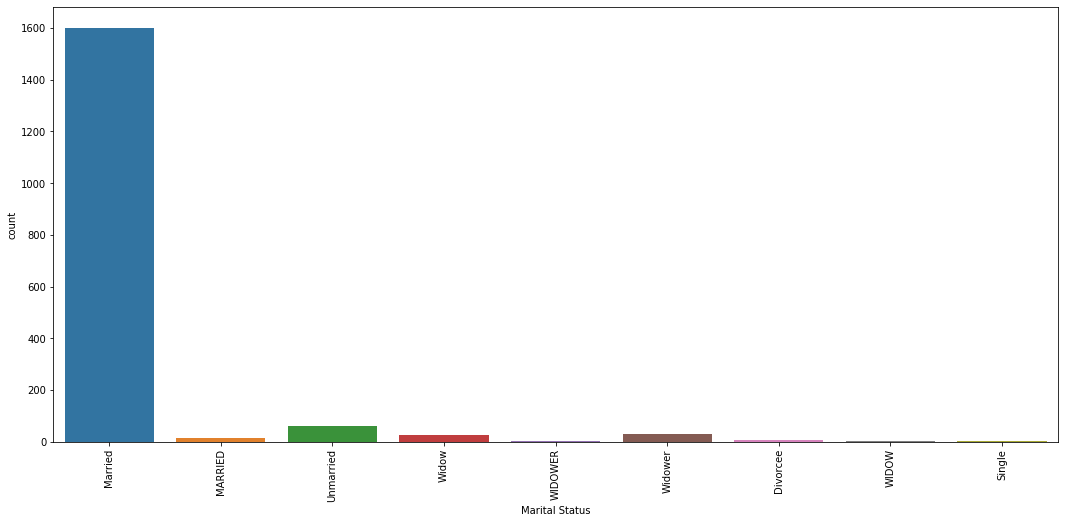

In [698]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'Marital Status', data = data)
xticks(rotation = 90)
plt.show();

#### Observations:
- We observe that most of the categories are repeated ('Married' and 'MARRIED', 'Widow' and 'WIDOW' etc.)
- Let's keep only one of the formats (uppercase)
- There is only one value for 'SINGLE', we will merge this with 'UNMARRIED'

In [699]:
data['Marital Status'] = data['Marital Status'].str.upper()
data['Marital Status']

0       MARRIED
1       MARRIED
2       MARRIED
5       MARRIED
10      MARRIED
         ...   
5000    MARRIED
5001    MARRIED
5002    MARRIED
5005    MARRIED
5008    MARRIED
Name: Marital Status, Length: 1769, dtype: object

In [700]:
data['Marital Status'] = data['Marital Status'].str.replace('SINGLE', "UNMARRIED")

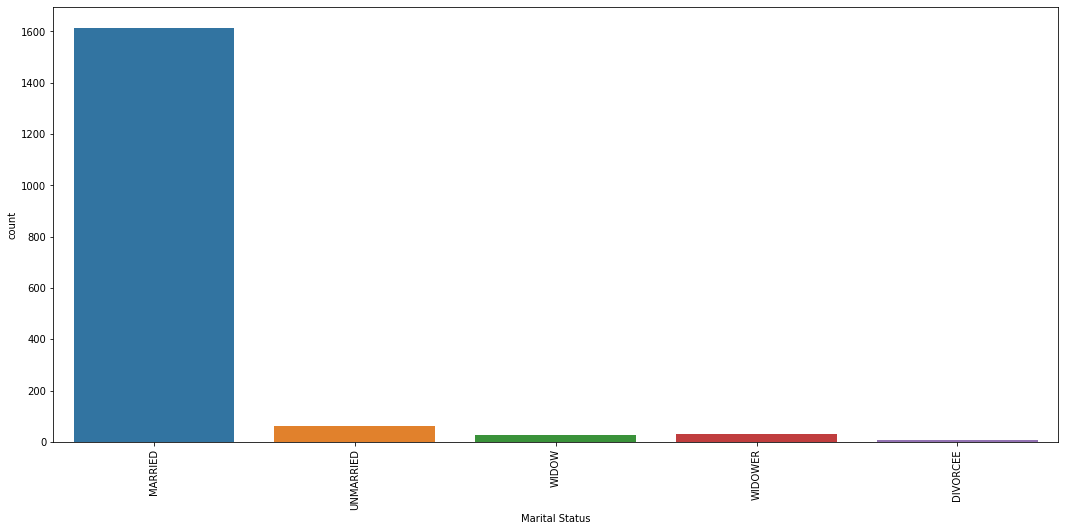

In [701]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'Marital Status', data = data)
xticks(rotation = 90)
plt.show();

#### Let's check Martial Status along with Age

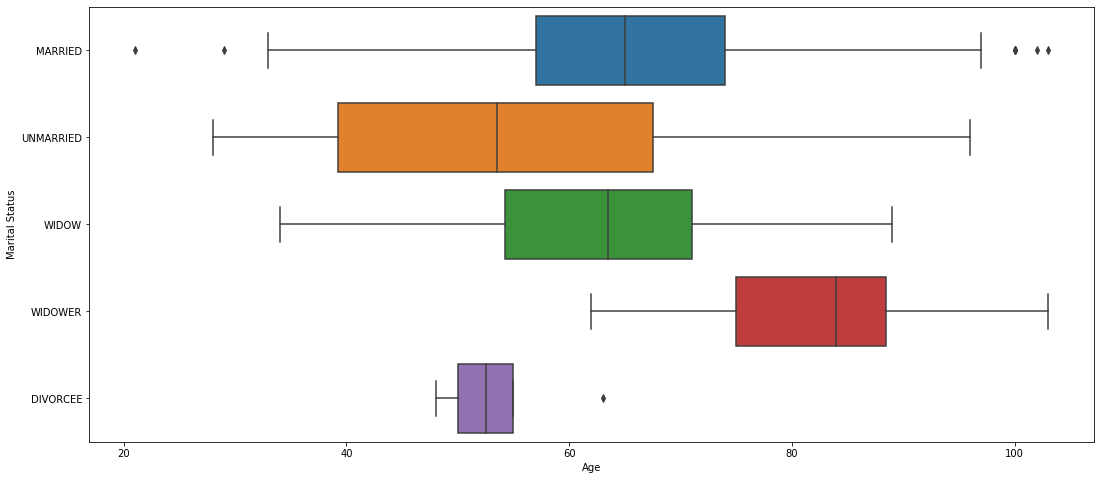

In [702]:
plt.figure(figsize = (18,8))
sns.boxplot(x = 'Age', y = 'Marital Status', data = data)
plt.show();

In [703]:
data['Marital Status'].value_counts(normalize = True)

MARRIED      0.927095
UNMARRIED    0.036165
WIDOWER      0.017796
WIDOW        0.015499
DIVORCEE     0.003444
Name: Marital Status, dtype: float64

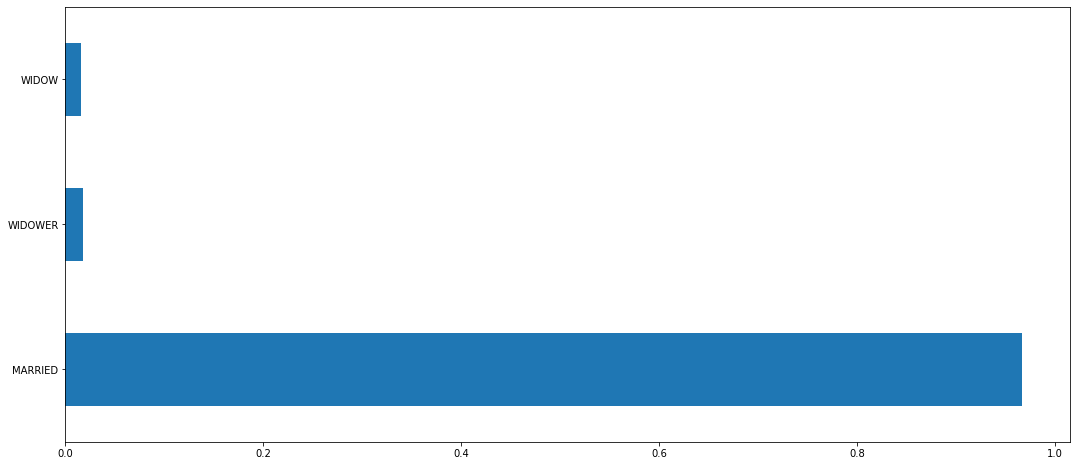

In [763]:
plt.figure(figsize = (18,8))
data['Marital Status'].value_counts(normalize = True).plot.barh()
plt.show();

#### Observations:
- Among married MPs, there are outliers. This could be because of early marriage for few and/ or data update missing for older MPs
- Almost 93% of the MPs are married while just under 4% are unmarried

#### Let's have a look at Profession

In [704]:
data['Profession'].value_counts()

Agriculturist                                                     227
Social Worker                                                     148
Agriculturist  Social Worker                                       95
Advocate                                                           70
Political and Social Worker                                        68
                                                                 ... 
Industrialist  Philanthropist, Educationist, Social Worker          1
Social Activist  Transporter                                        1
Agriculturist  Publisher, Poet, Journalist, Writer, Film Maker      1
Civil Constructions  Chemical & Pharmaceuticals,Agriculturist       1
Educationist  Agriculturist, Social Worker                          1
Name: Profession, Length: 566, dtype: int64

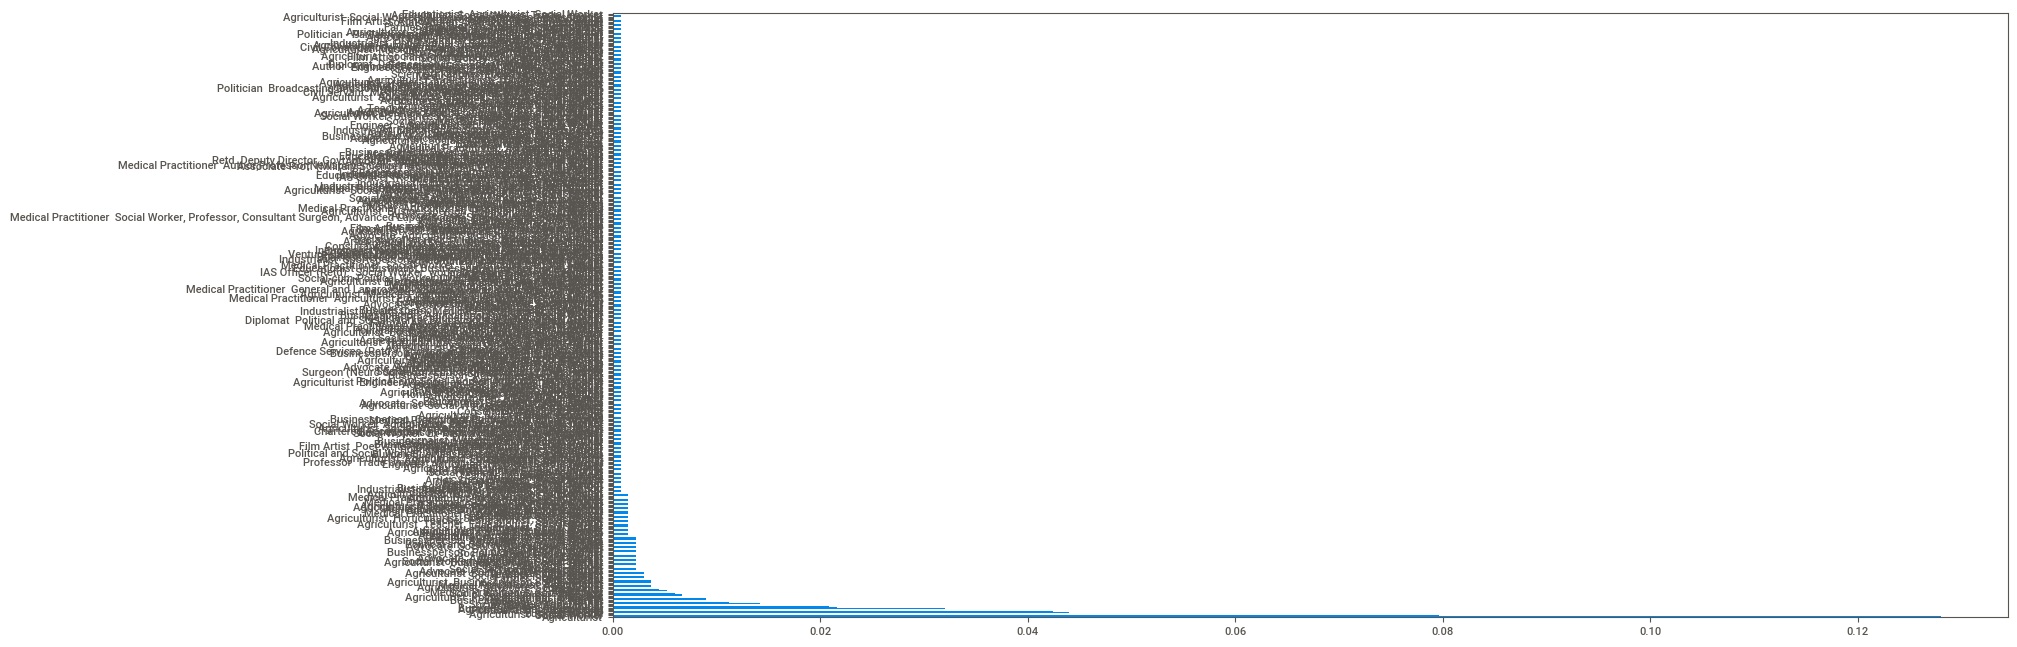

In [786]:
plt.figure(figsize = (18,8))
data['Profession'].value_counts(normalize = True).plot.barh()
plt.show();

## Please Note: We tried a number of different ways to extract first word out of this field BUT we could not get it. Hence, we will leave this as it is.

### Let us check for Null values in the dataset

In [706]:
def null_percentage():
    null_cols = [col for col in data.columns if data[col].isnull().sum()>0]
    null_leads = pd.DataFrame(round(100*data[null_cols].isnull().mean(),2).sort_values(ascending = False))
    null_leads.columns = ["Null Percentage"]
    null_leads.sort_values(by = "Null Percentage", inplace = True, ascending = False)
    return null_leads
null_percentage()

,Null Percentage
Date of Marriage,14.81
Mother's Name,7.69
Spouse's Name,6.78
Profession,4.58
Place of Birth,2.09
Father's Name,1.58
Marital Status,1.53
Educational Qualifications,1.36
Present Address,1.24
Age,0.85


#### We are dropping null values where % of null values is less than 2%

In [707]:
data.dropna(inplace = True)

In [708]:
def null_percentage():
    null_cols = [col for col in data.columns if data[col].isnull().sum()>0]
    null_leads = pd.DataFrame(round(100*data[null_cols].isnull().mean(),2).sort_values(ascending = False))
    null_leads.columns = ["Null Percentage"]
    null_leads.sort_values(by = "Null Percentage", inplace = True, ascending = False)
    return null_leads
null_percentage()

,Null Percentage


#### Let's check the Party Name column

In [709]:
data['Party Name'].value_counts()

Bharatiya Janata Party(BJP)                                           327
Indian National Congress (INC)                                        223
Bharatiya Janata Party (BJP)                                          130
Indian National Congress(INC)                                          62
Communist Party of India (Marxist) (CPI(M))                            44
                                                                     ... 
Akhil Bharatiya Lok Tantrik Congress (ABLTC)                            1
Swabhimani Paksha(SWP)                                                  1
All India Majlis-E-Ittehadul Muslimeen (AIMIM)                          1
Communist Party of India (Marxist-Lennist Liberation) (CPI(ML)(L))      1
Revolutionary Socialist Party(RSP)                                      1
Name: Party Name, Length: 91, dtype: int64

In [710]:
data['Party Name'] = data['Party Name'].astype(str)

#### Observations:
- We observe that each party's name is repeated in two formats: one in which acronym of the party within brackets is right after the text and another one where there is a space between the two. Let's fix this.
- Also, categories Independents and Independent should be same, let's combine these

In [711]:
data['Party Name'] = data['Party Name'].astype(str).apply(lambda st: st[:st.find("(")])
data['Party Name'] = data['Party Name'].str.rstrip()

In [712]:
data['Party Name'] = data['Party Name'].str.replace('Independents', "Independent")

In [713]:
data['Party Name'].value_counts(normalize = True)

Bharatiya Janata Party                        0.340283
Indian National Congress                      0.212211
Communist Party of India                      0.051378
All India Anna Dravida Munnetra Kazhagam      0.034252
Samajwadi Party                               0.031273
Dravida Munnetra Kazhagam                     0.030529
Bahujan Samaj Party                           0.029784
Telugu Desam Party                            0.027550
All India Trinamool Congress                  0.027550
Shiv Sena                                     0.026806
Janata Dal                                    0.024572
Biju Janata Dal                               0.023827
Yuvajana Sramika Rythu Congress Party         0.016381
Rashtriya Janata Dal                          0.014147
Nationalist Congress Party                    0.011914
Telangana Rashtra Samithi                     0.011169
Independent                                   0.010424
Shiromani Akali Dal                           0.008935
Indian Nat

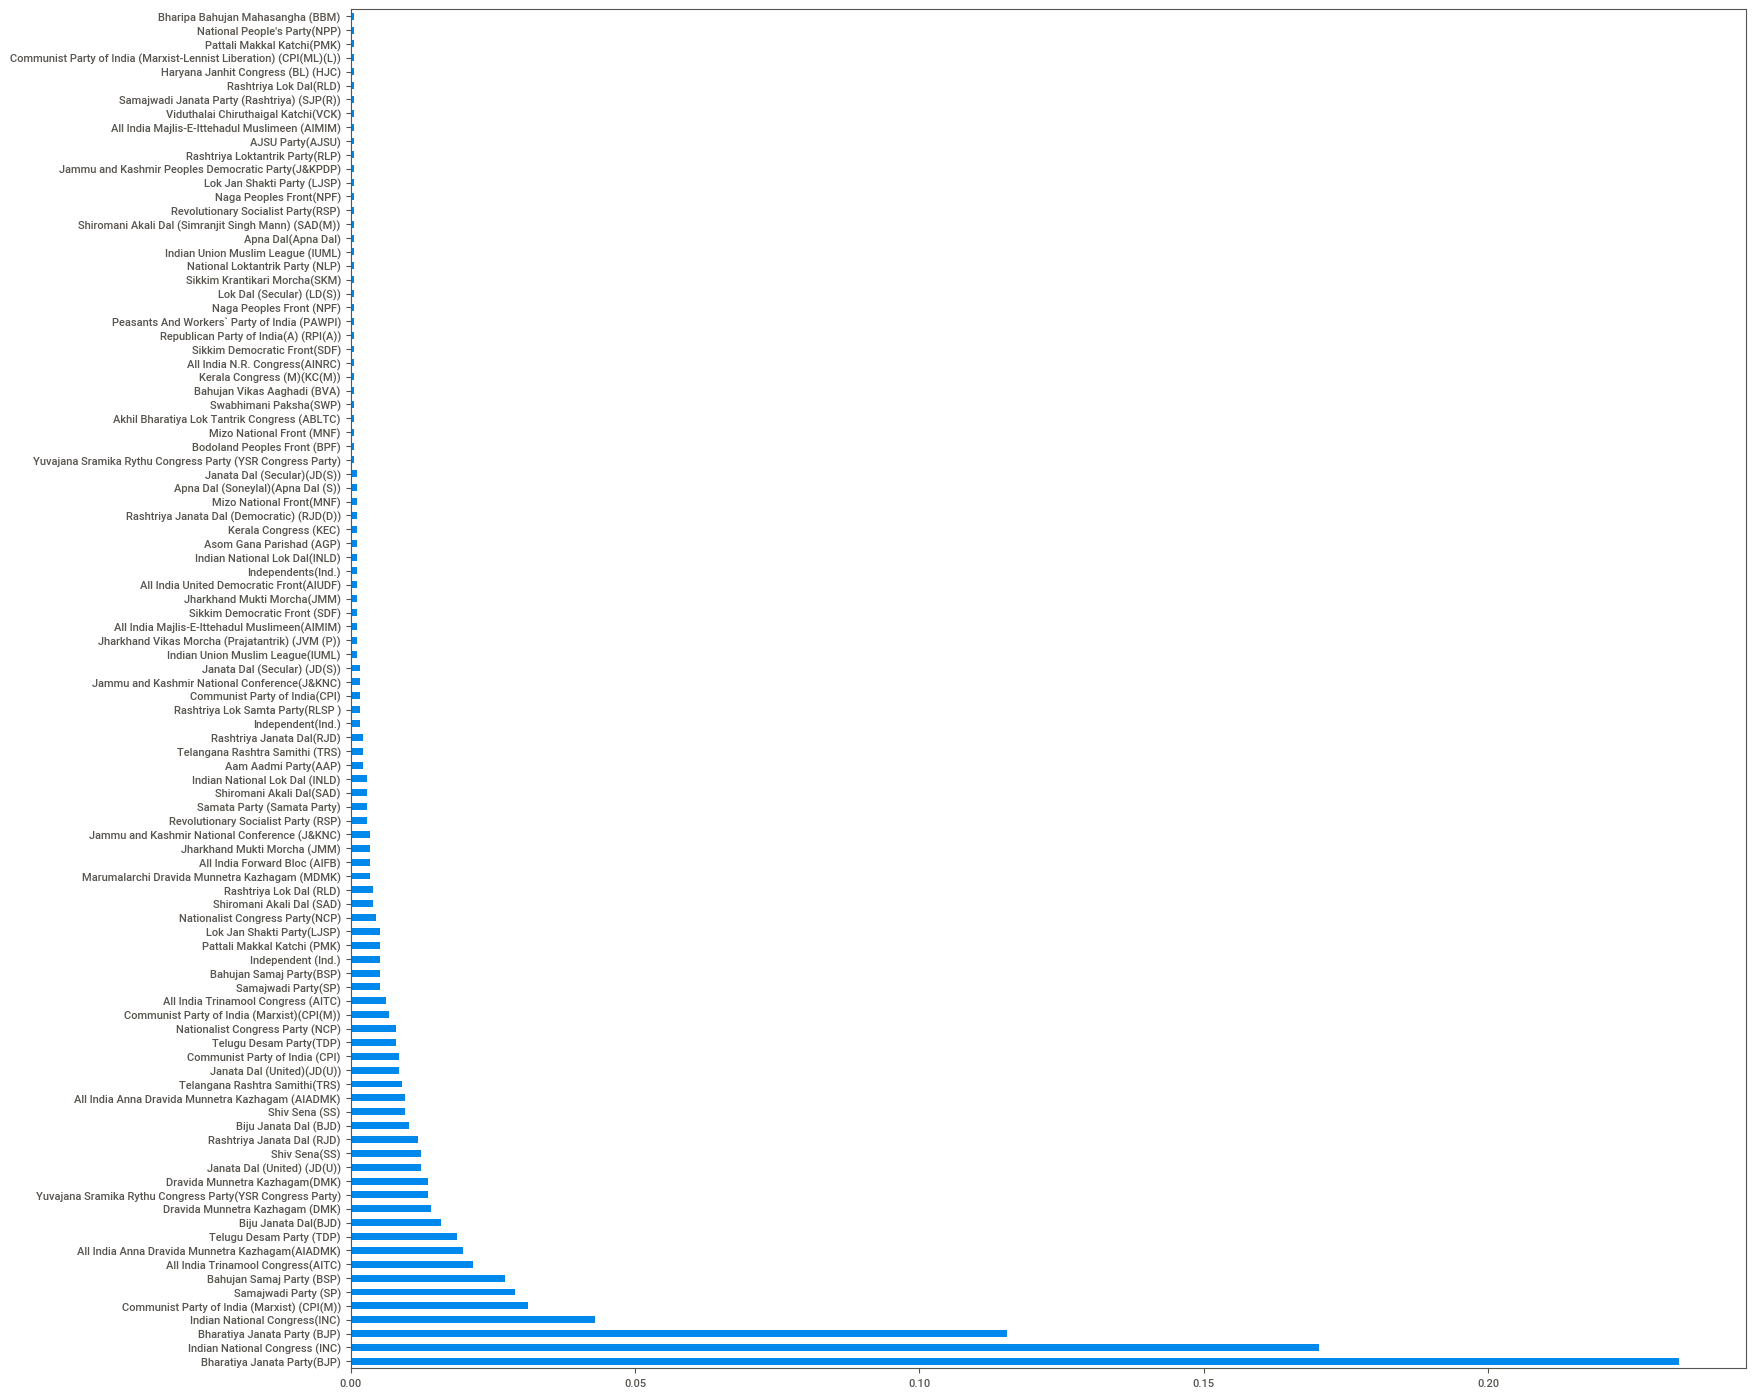

In [811]:
plt.figure(figsize = (18,18))
data['Party Name'].value_counts(normalize = True).plot.barh()
plt.show();

Let's visualize the above information

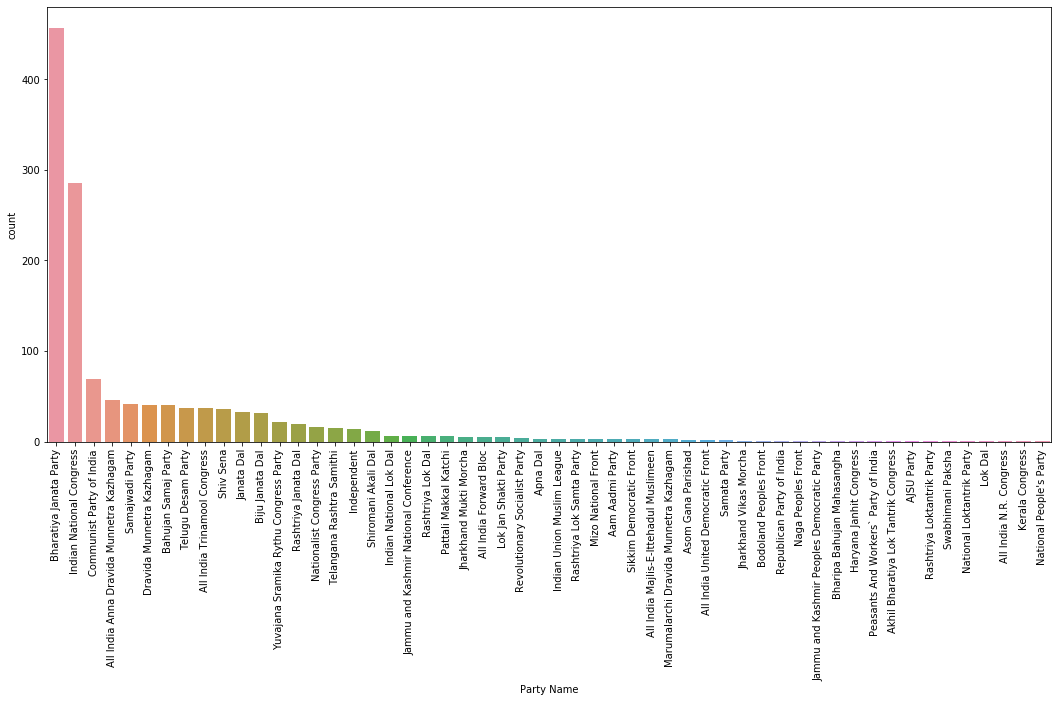

In [714]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'Party Name', data = data, order = data['Party Name'].value_counts().index)
xticks(rotation = 90)
plt.show();

#### Observations:
- BJP seems to be having the higest number of MPs at 34% followed by Congress (21%) and CPI (5%)
- Most of the parties have less than 3.5% presence among MPs across the years

#### Let's check place of birth

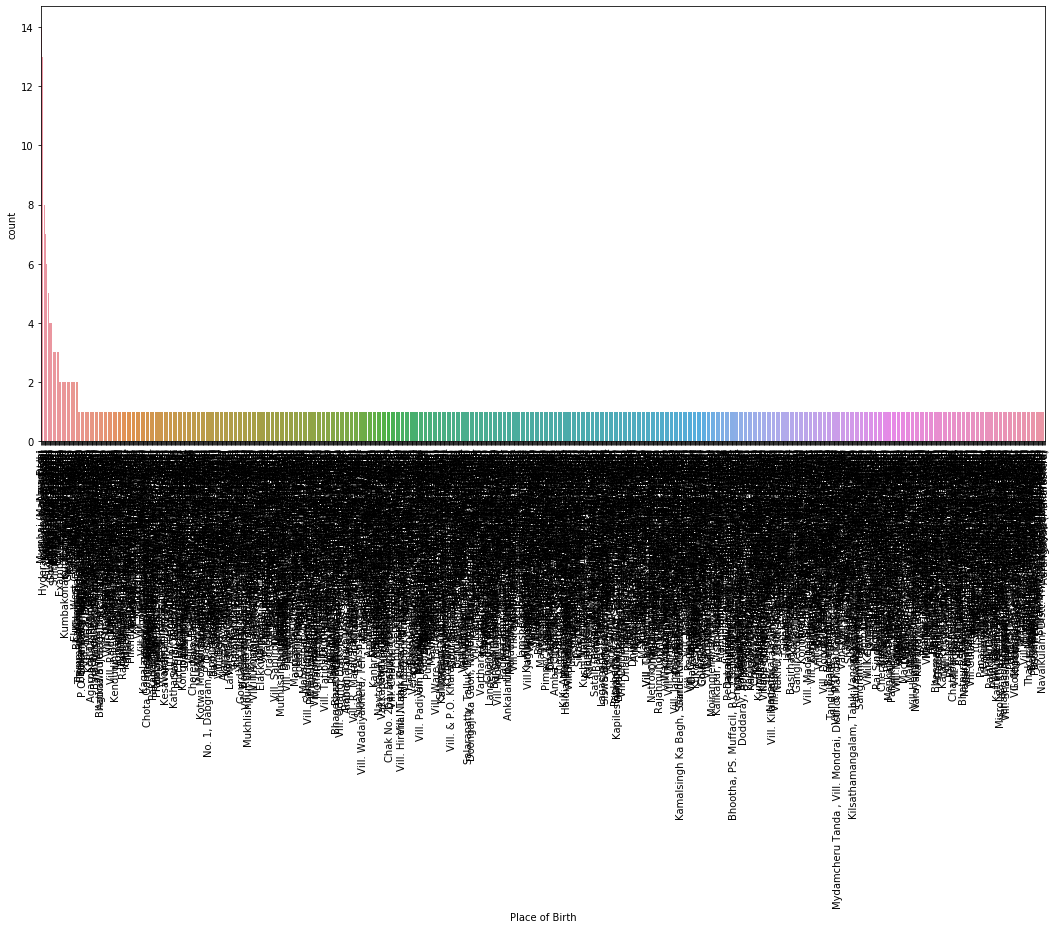

In [715]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'Place of Birth', data = data, order = data['Place of Birth'].value_counts().index)
xticks(rotation = 90)
plt.show();

## Please Note: We tried a number of different ways to extract first word out of this field BUT we could not get it. Hence, we will leave this as it is.

#### Let's look at Constituency field

In [716]:
# text = " \(SC) "
# text = str(text)
# text

In [717]:
# data['Constituency_a'] = data['Constituency'].to_string().replace(" (SC) ", " SC ")
# data['Constituency_a'] = data['Constituency'].to_string().replace(" (ST) ", " ST ")
# data['Constituency_a']

In [718]:
# val = data['Constituency'].to_string().split('(', 1)[1].split(')')[0]
# val

In [719]:
# data['Constituency_a'] = data['Constituency'].to_string().split(" (SC) ")
# data['Constituency_a']

## Please Note: We tried a number of different ways to extract State name and caste (SC, ST or Others) out of this field BUT we could not get it. Hence, we will leave this as it is.

In [720]:
# data['Constituency']

In [721]:
# data['State'] = data['Constituency'].astype(str).apply(lambda st: st[st.find("("):st.find(")")])
# data['State']


# data['Party Name'] = data['Party Name'].astype(str).apply(lambda st: st[:st.find("(")])

In [722]:
# data['State']

In [726]:
data['Educational Qualifications']

0       B.Sc., B.L., M.L. Educated at Government Arts ...
1       IntermediateEducated at Sir Thiyagaraja Colleg...
2       B.A. Educated at Government Arts College, Beng...
5       M.A. (Economics), Diploma in Computer Programm...
10      M.B.B.S.Educated at S.M.S. Medical College, Ja...
                              ...                        
4995    Higher Secondary Educated at Higher Secondary ...
4997    Intermediate Educated at M.W.M.L. Inter Colleg...
5000       B.Sc. Educated at D.A.V. College, Siwan, Bihar
5005    M.Sc.(Physics), M.A. (Political Science) and P...
5008    B.A. (Hons.), LL.B.Educated at Magadh Universi...
Name: Educational Qualifications, Length: 1343, dtype: object

In [727]:
data['Educational Qualifications_'] = data['Educational Qualifications'].astype(str).str[0:4]
data['Educational Qualifications_']

0       B.Sc
1       Inte
2       B.A.
5       M.A.
10      M.B.
        ... 
4995    High
4997    Inte
5000    B.Sc
5005    M.Sc
5008    B.A.
Name: Educational Qualifications_, Length: 1343, dtype: object

In [732]:
data['Educational Qualifications_'] = data['Educational Qualifications_'].to_string().replace(r'(^.*.B.*$)', "Graduate")
data['Educational Qualifications_']

0       0           B.Sc\n1           Inte\n2         ...
1       0           B.Sc\n1           Inte\n2         ...
2       0           B.Sc\n1           Inte\n2         ...
5       0           B.Sc\n1           Inte\n2         ...
10      0           B.Sc\n1           Inte\n2         ...
                              ...                        
4995    0           B.Sc\n1           Inte\n2         ...
4997    0           B.Sc\n1           Inte\n2         ...
5000    0           B.Sc\n1           Inte\n2         ...
5005    0           B.Sc\n1           Inte\n2         ...
5008    0           B.Sc\n1           Inte\n2         ...
Name: Educational Qualifications_, Length: 1343, dtype: object

## Please Note: We tried a number of different ways to extract State name and caste (SC, ST or Others) out of this field BUT we could not get it. Hence, we will leave this as it is.

#### Using sweetviz

In [800]:
report = sweetviz.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



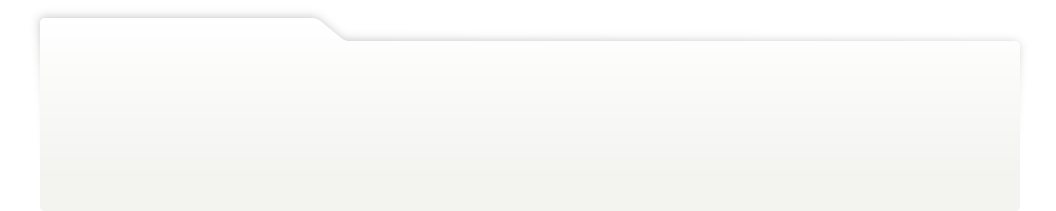
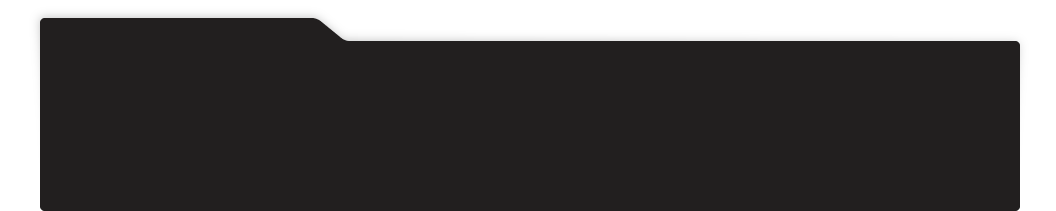
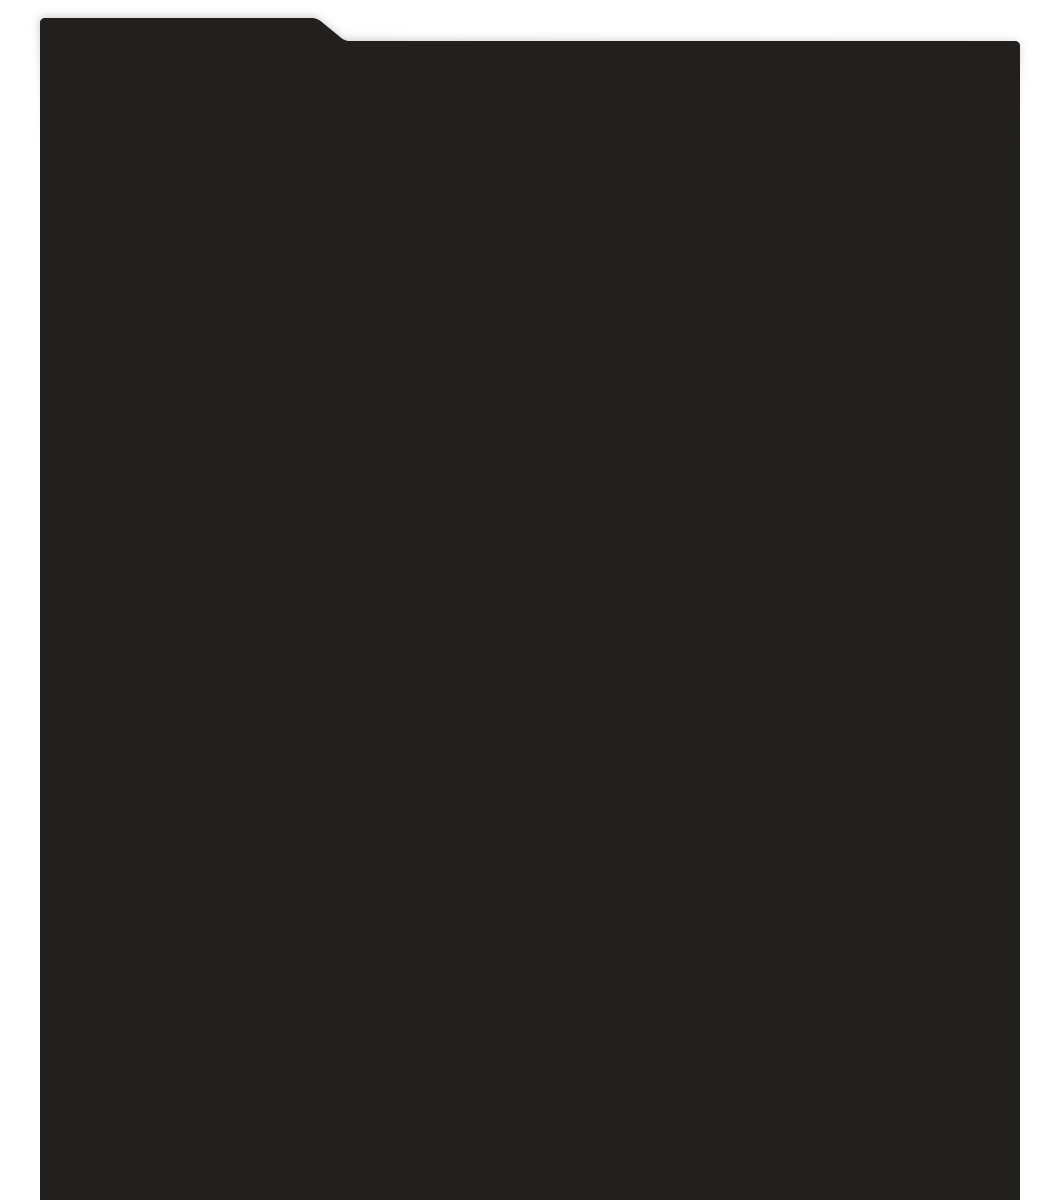
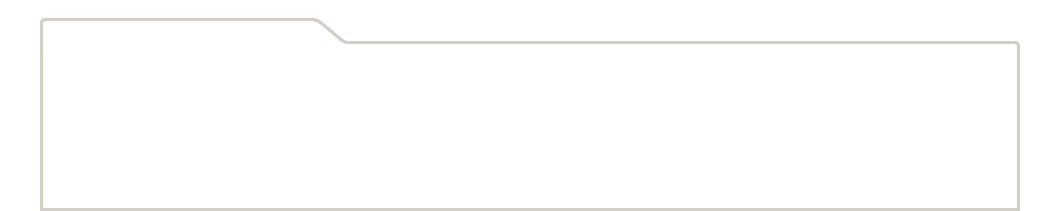
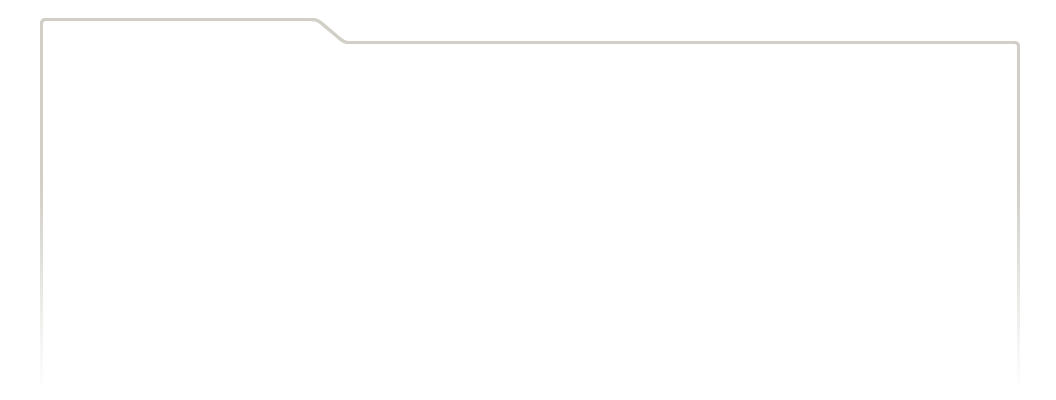
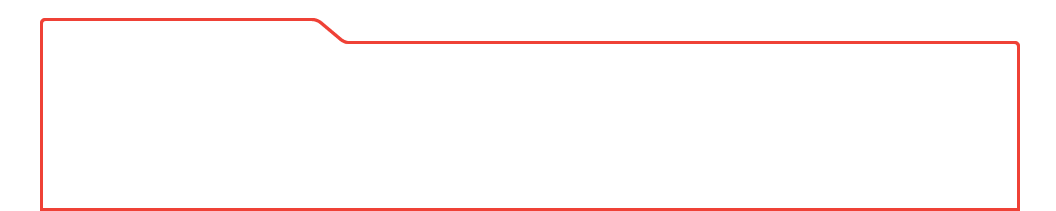
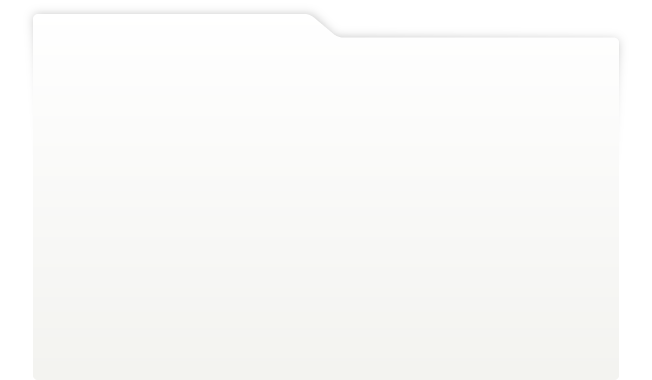
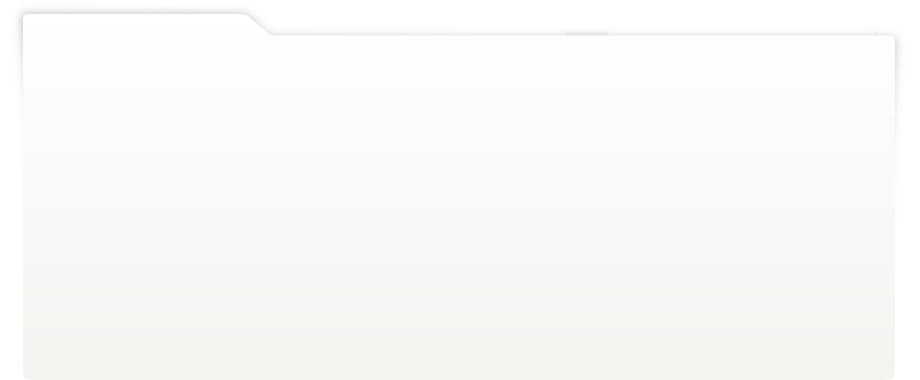
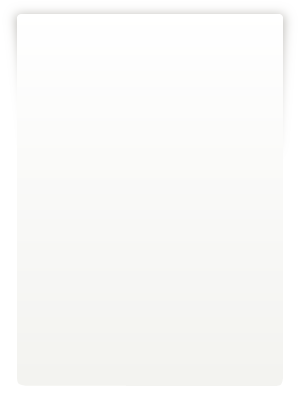
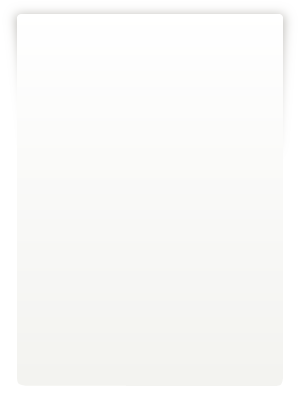
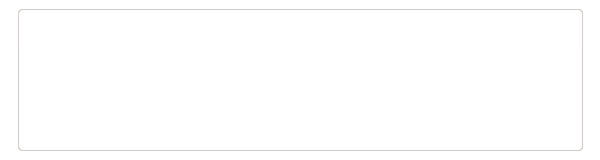
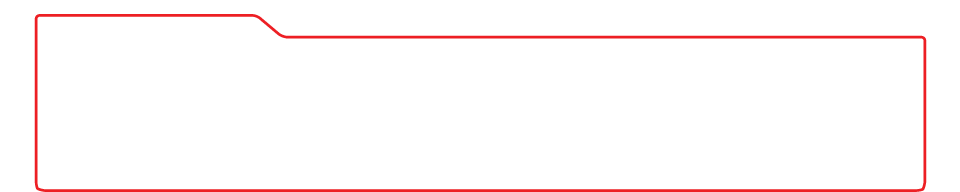
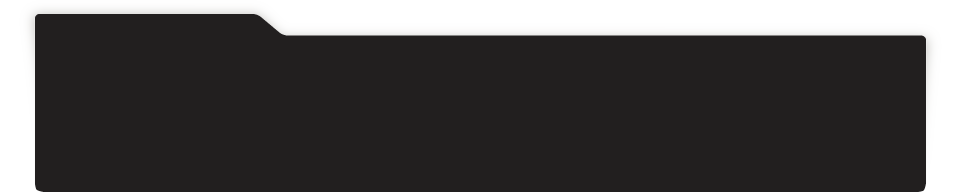
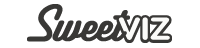
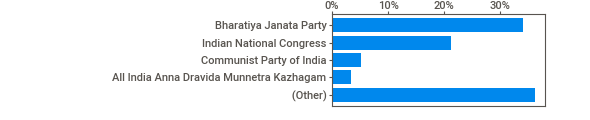
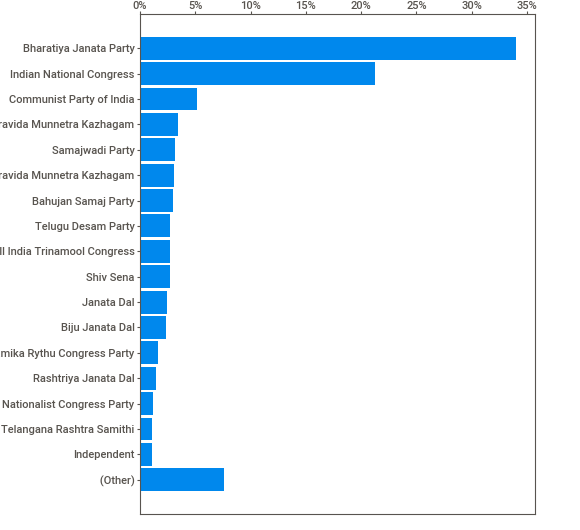
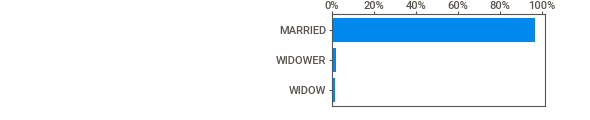
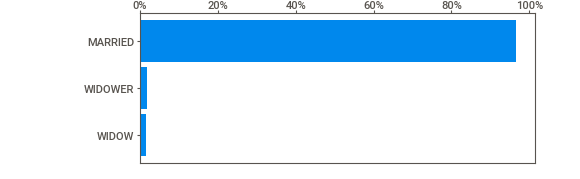
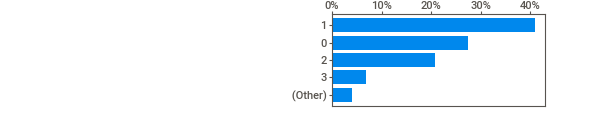
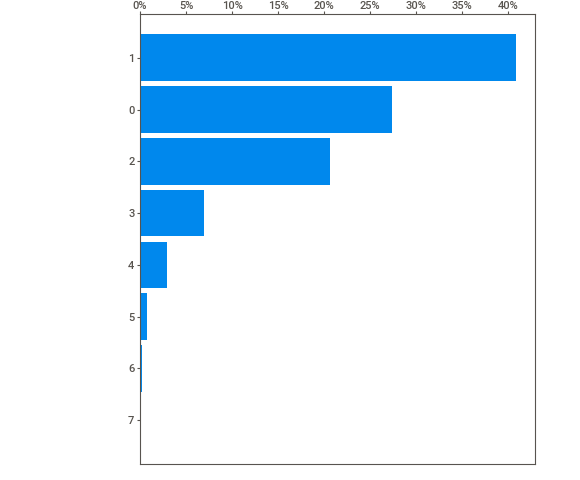
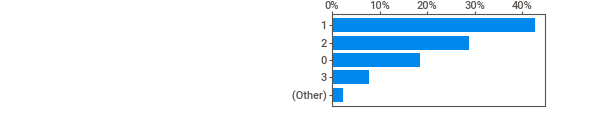
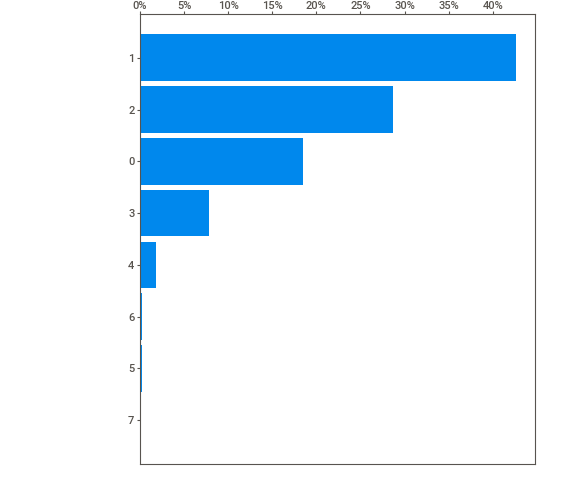
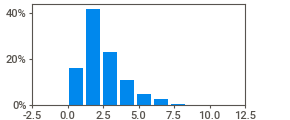
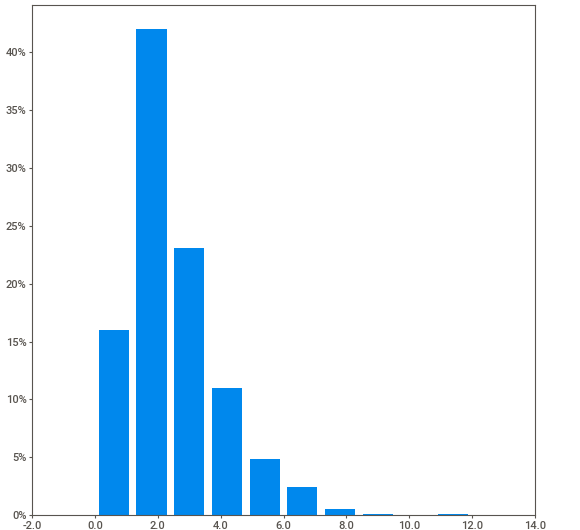
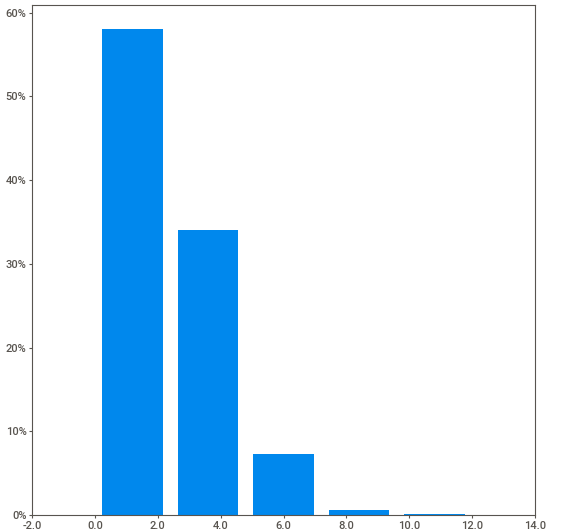
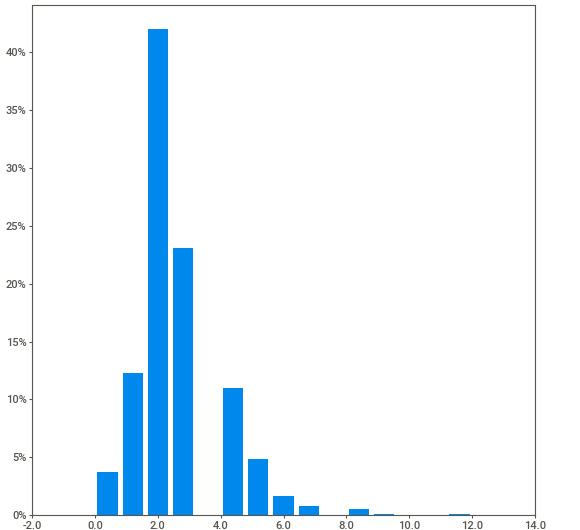
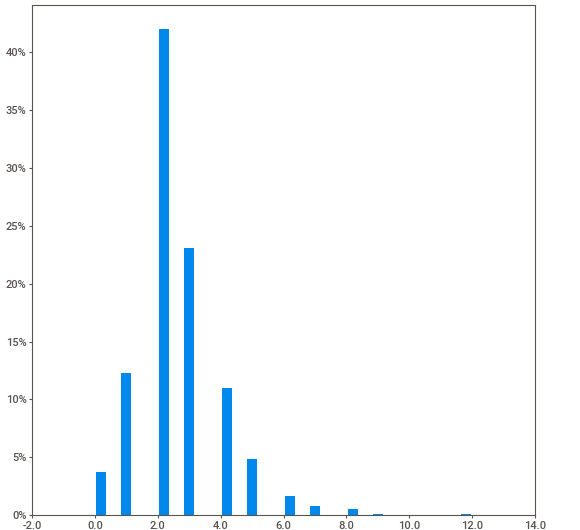
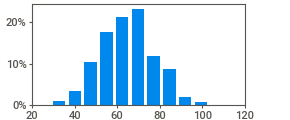
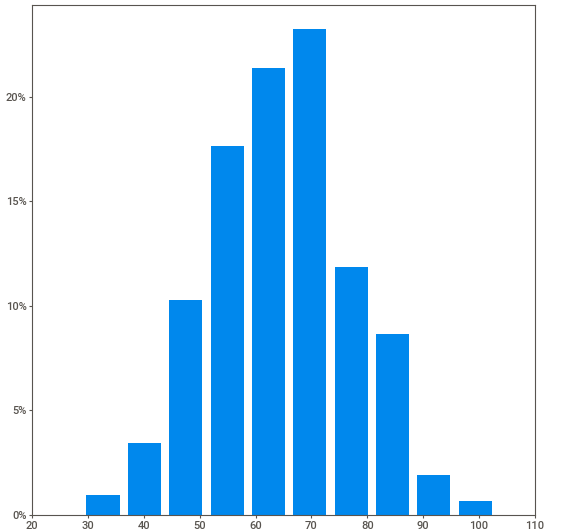
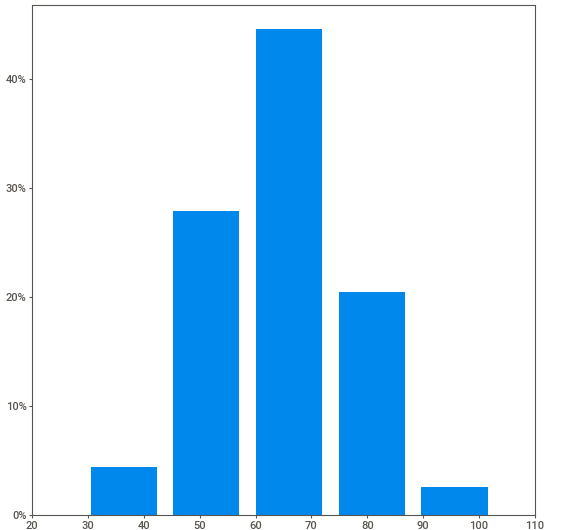
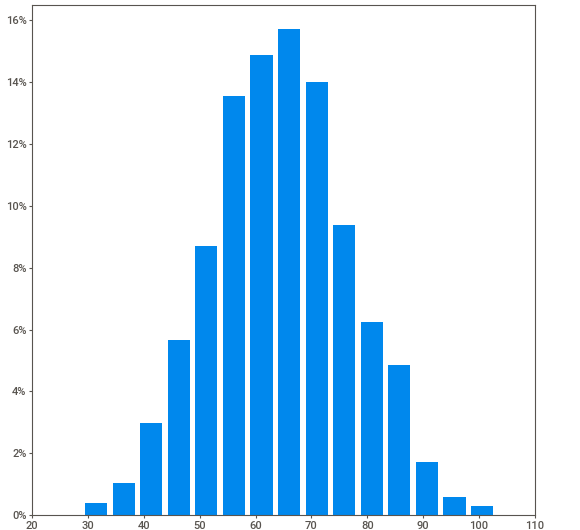
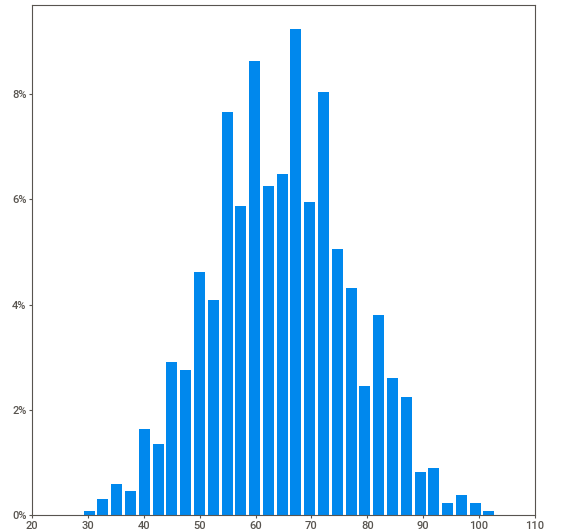
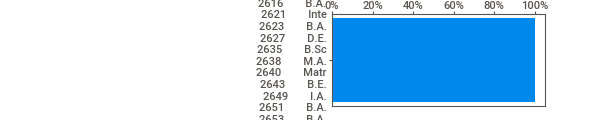
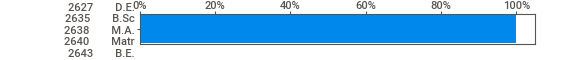
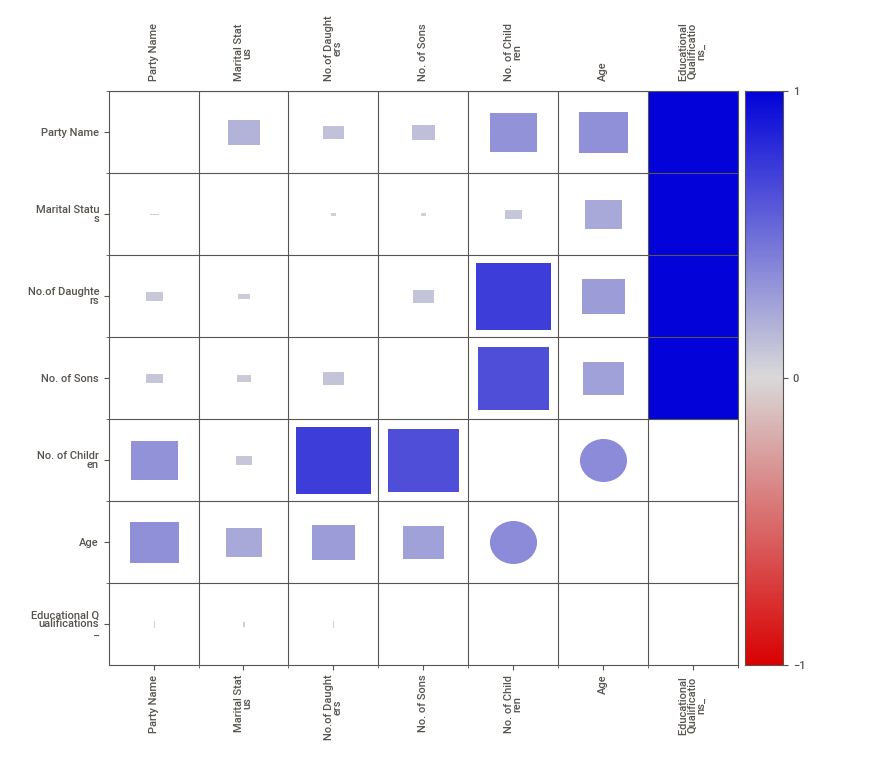
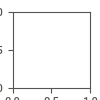

In [804]:
from IPython.display import HTML

HTML(filename="SWEETVIZ_REPORT.html")

## Conclusion:
1. We learnt how to do web scraping
2. We cleaned the dataset
3. We figured out that datasets don't just need cleaning but feature engineering as well
4. We understood how to utilize visualzations
5. We made inferences from the dataset which might help us in doing further analysis

# THANK YOU !!!